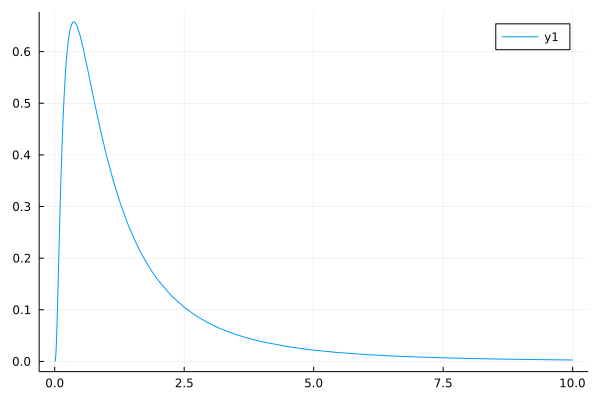

In [9]:
using Random
using Distributions
using StatsPlots
default(titlefontsize=12)
plot(LogNormal(), 0, 10)

In [12]:
function sim_clt(dist, n; L=10^5)
    μ, σ = mean(dist), std(dist)
    Z = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = rand!(dist, tmp[Threads.threadid()])
        Z[i] = √n * (mean(X) - μ)/σ
    end
    Z
end

function plot_clt(dist, n; L=10^5, label="sample means", kwargs...)
    Z = sim_clt(dist, n; L)
    histogram(Z; norm=true, alpha=0.3, label, kwargs...)
    plot!(Normal(); label="Normal()", lw=1.5)
end

plot_clt (generic function with 1 method)

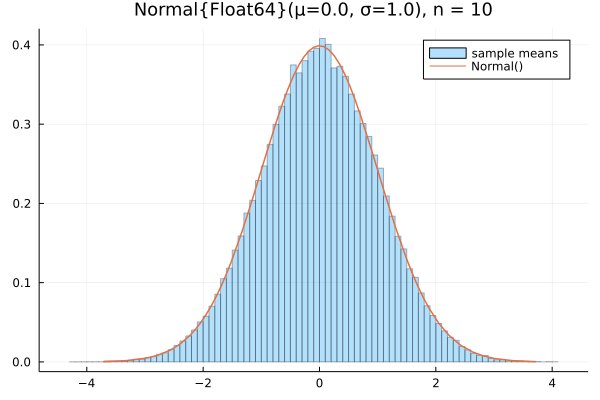

In [14]:
dist, n = Normal(), 10
plot_clt(dist, n; title="$dist, n = $n")

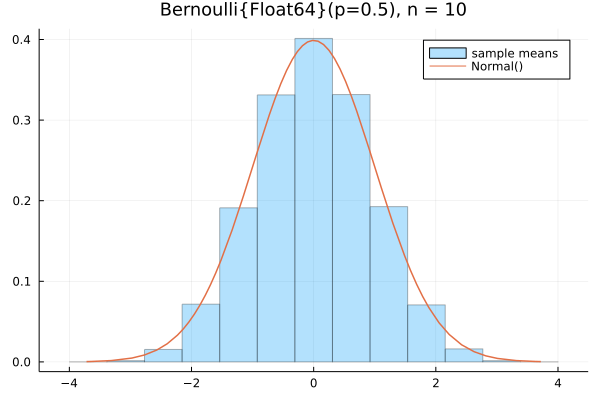

In [22]:
dist, n = Bernoulli(0.5), 10
plot_clt(dist, n; bin=range(-4, 4, 14), title="$dist, n = $n")

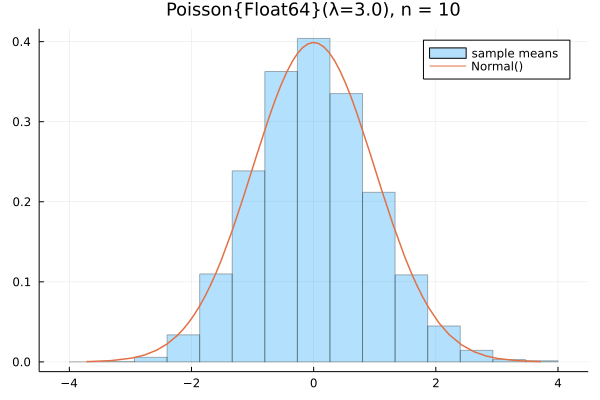

In [27]:
dist, n = Poisson(3), 10
plot_clt(dist, n; bin=range(-4, 4, 16), title="$dist, n = $n")

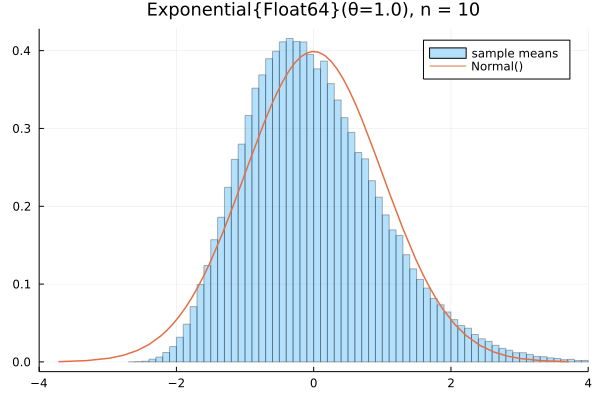

In [47]:
dist, n = Exponential(), 10
plot_clt(dist, n; xlim=(-4, 4), title="$dist, n = $n")

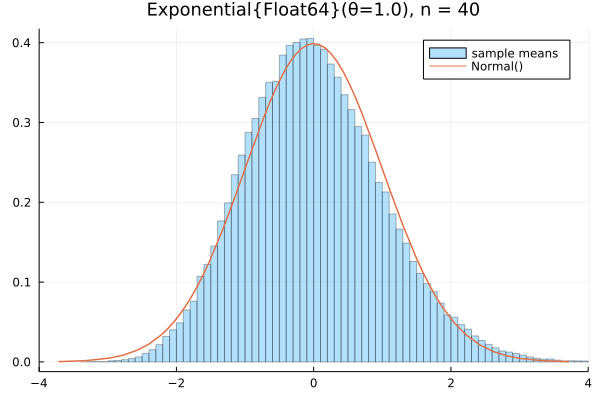

In [46]:
dist, n = Exponential(), 40
plot_clt(dist, n; xlim=(-4, 4), title="$dist, n = $n")

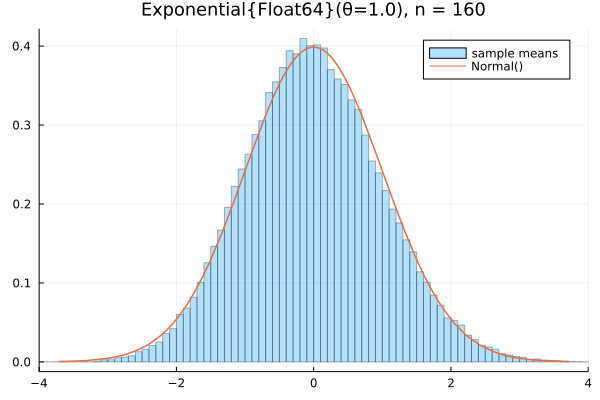

In [44]:
dist, n = Exponential(), 160
plot_clt(dist, n; xlim=(-4, 4), title="$dist, n = $n")

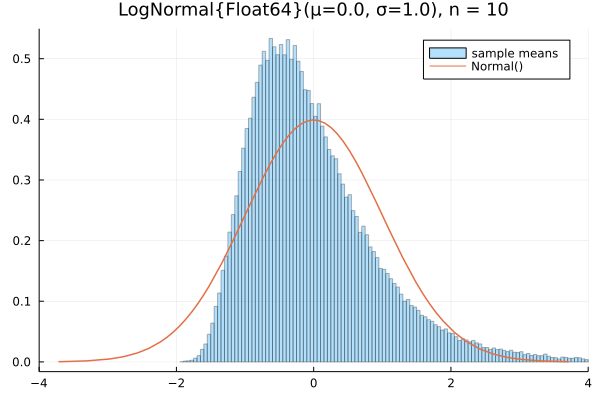

In [42]:
dist, n = LogNormal(), 10
plot_clt(dist, n; xlim=(-4, 4), title="$dist, n = $n")

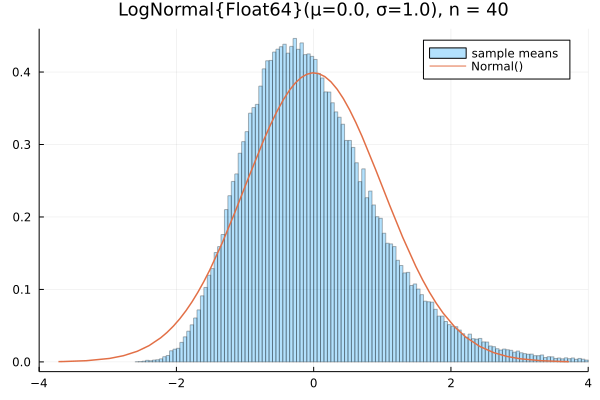

In [41]:
dist, n = LogNormal(), 40
plot_clt(dist, n; xlim=(-4, 4), title="$dist, n = $n")

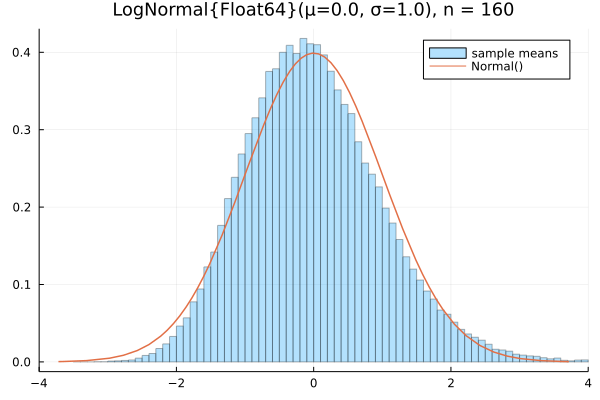

In [40]:
dist, n = LogNormal(), 160
plot_clt(dist, n; xlim=(-4, 4), title="$dist, n = $n")

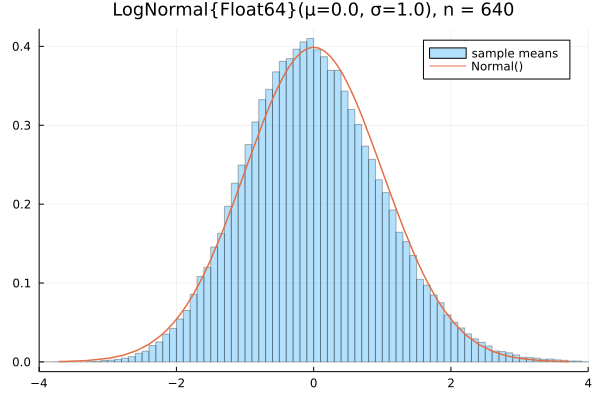

In [43]:
dist, n = LogNormal(), 640
plot_clt(dist, n; xlim=(-4, 4), title="$dist, n = $n")